In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('housing.csv')

In [4]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
data.shape

(20640, 10)

In [6]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
data1=data.drop(['ocean_proximity'],axis=1)

In [11]:
data1.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [12]:
#sns.pairplot(data1)

In [13]:
data.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7878     -118.11     33.88                19.0       3203.0           708.0   
15126    -116.84     32.86                16.0       2502.0           532.0   
1003     -121.78     37.69                35.0       2853.0           588.0   
7397     -118.23     33.96                36.0       1062.0           270.0   
12207    -116.96     33.52                 9.0       2802.0           471.0   

       population  households  median_income  median_house_value  \
7878       1761.0       667.0         4.0911            239700.0   
15126      1211.0       494.0         3.2516            202100.0   
1003       1761.0       572.0         4.3533            168400.0   
7397       1136.0       273.0         1.6597            109100.0   
12207      1155.0       421.0         4.1250            392100.0   

      ocean_proximity  
7878        <1H OCEAN  
15126       <1H OCEAN  
1003           INLAND  
7397        <1H OCEAN  
12207          INLAND

In [14]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['median_house_value'],axis=1),data.median_house_value,test_size=.2,random_state=42)

In [15]:
import numpy as np
functiontran=FunctionTransformer(func=np.log1p)

In [16]:
x=functiontran.fit_transform(x_train['median_income'])
y=functiontran.transform(x_test['median_income'])

C:\Users\amanc\AppData\Local\Temp\ipykernel_40100\3994601939.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['median_income'])


[]

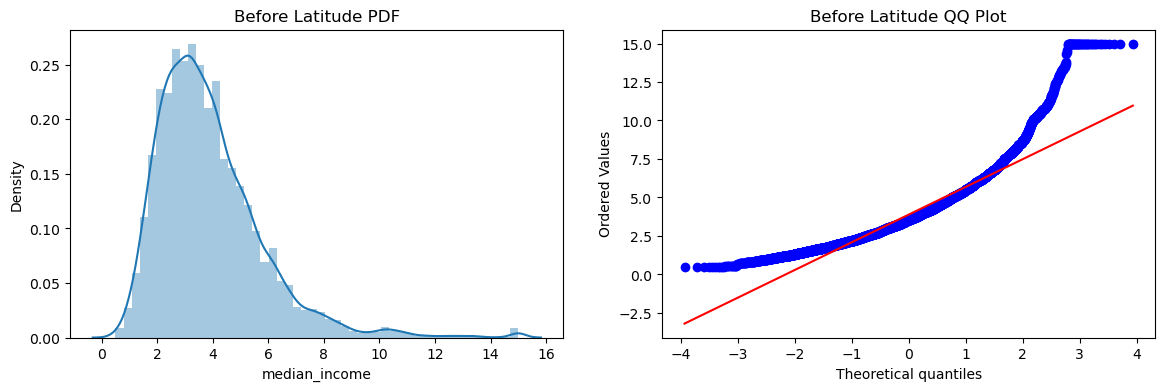

In [17]:
import scipy.stats as stats
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['median_income'])
plt.title('Before Latitude PDF')

plt.subplot(122)
stats.probplot(x_train['median_income'],dist='norm',plot=plt)
plt.title('Before Latitude QQ Plot')
plt.plot()

C:\Users\amanc\AppData\Local\Temp\ipykernel_40100\1230299467.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


[]

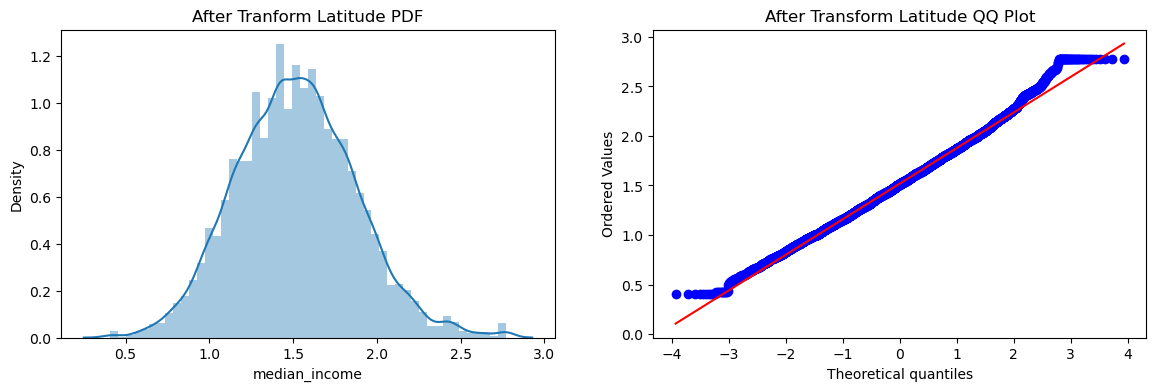

In [18]:
import scipy.stats as stats
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x)
plt.title('After Tranform Latitude PDF')

plt.subplot(122)
stats.probplot(x,dist='norm',plot=plt)
plt.title('After Transform Latitude QQ Plot')
plt.plot()

### Simple Imputer==>One Hot Encoding==>Function Transformer ==>Scaling==>Machine Learning Algorithm

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [20]:
x_train.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   

       population  households  median_income ocean_proximity  
14196      2300.0       623.0         3.2596      NEAR OCEAN  
8267       1314.0       756.0         3.8125      NEAR OCEAN

In [21]:
x_train.ocean_proximity.unique()

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [22]:
trf1=ColumnTransformer([
    ('imputer',SimpleImputer(),[4])
],remainder='passthrough')

In [23]:
trf2=ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[-1])
],remainder='passthrough')

In [24]:
trf=ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[-1]),
    ('imputer',SimpleImputer(),[4])
],remainder='passthrough')

In [25]:
h=trf.fit_transform(x_train)
k=trf.transform(x_test)

In [26]:
h1=h.tolist()

In [27]:
h2=pd.DataFrame(data=h1,columns=['INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND','total_bedrooms','longitude','latitude','housing_median_age','total_rooms','population','households','median_income'])

In [28]:
h2

INLAND  <1H OCEAN  NEAR BAY  ISLAND  total_bedrooms  longitude  \
0         0.0        0.0       0.0     1.0           627.0    -117.03   
1         0.0        0.0       0.0     1.0           787.0    -118.16   
2         0.0        0.0       0.0     1.0           331.0    -120.48   
3         0.0        0.0       0.0     1.0           367.0    -117.11   
4         1.0        0.0       0.0     0.0           431.0    -119.80   
...       ...        ...       ...     ...             ...        ...   
16507     0.0        0.0       0.0     0.0           201.0    -117.96   
16508     1.0        0.0       0.0     0.0           570.0    -117.43   
16509     0.0        0.0       0.0     0.0           569.0    -118.38   
16510     0.0        0.0       0.0     0.0           597.0    -121.96   
16511     0.0        0.0       1.0     0.0          1315.0    -122.42   

       latitude  housing_median_age  total_rooms  population  households  \
0         32.71                33.0       3126.0      2300.0       623.0   
1         33.77                49.0       3382.0      1314.0       756.0   
2         34.66                 4.0       1897.0       915.0       336.0   
3         32.69                36.0       1421.0      1418.0       355.0   
4         36.78                43.0       2382.0       874.0       380.0   
...         ...                 ...          ...         ...         ...   
16507     33.78                35.0       1330.0       658.0       217.0   
16508     34.02                33.0       3084.0      1753.0       449.0   
16509     34.03                36.0       2101.0      1756.0       527.0   
16510     37.58                15.0       3575.0      1777.0       559.0   
16511     37.77                52.0       4226.0      2619.0      1242.0   

       median_income  
0             3.2596  
1             3.8125  
2             4.1563  
3             1.9425  
4             3.5542  
...              ...  
16507         6.3700  
16508         3.0500  
16509         2.9344  
16510         5.7192  
16511         2.5755  

[16512 rows x 12 columns]

In [29]:
h2.shape

(16512, 12)

In [30]:
trf4=ColumnTransformer([
    ('ft',FunctionTransformer(func=np.log1p,validate=True),[4,6,7,8,9,10,11]),
    ('ft1',PowerTransformer(),[5]),
    
],remainder='passthrough')


In [31]:
trf6=ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,12))
])

In [32]:
x_train_ft=trf4.fit_transform(h)
x_test_ft=trf4.transform(k)

In [33]:
x_trainft1=trf6.fit_transform(x_train_ft)
x_testft1=trf6.transform(x_test_ft)

In [34]:
h3=h.tolist()
h4=pd.DataFrame(data=x_train_ft,columns=['total_bedrooms','longitude','latitude','housing_median_age','total_rooms','population','households','median_income','INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'])
h4

total_bedrooms  longitude  latitude  housing_median_age  total_rooms  \
0            6.442540   3.517795  3.526361            8.047829     7.741099   
1            6.669498   3.548755  3.912023            8.126518     7.181592   
2            5.805135   3.574030  1.609438            7.548556     6.820016   
3            5.908083   3.517201  3.610918            7.259820     7.257708   
4            6.068426   3.631780  3.784190            7.776115     6.774224   
...               ...        ...       ...                 ...          ...   
16507        5.308268   3.549043  3.583519            7.193686     6.490724   
16508        6.347389   3.555919  3.526361            8.034307     7.469654   
16509        6.345636   3.556205  3.610918            7.650645     7.471363   
16510        6.393591   3.652734  2.772589            8.182000     7.483244   
16511        7.182352   3.657647  3.970292            8.349248     7.870930   

       population  households  median_income  INLAND  <1H OCEAN  NEAR BAY  \
0        6.436150    1.449175   3.191891e-15     0.0        0.0       0.0   
1        6.629363    1.571217   1.637579e-15     0.0        0.0       0.0   
2        5.820083    1.640219  -1.221245e-15     0.0        0.0       0.0   
3        5.874931    1.079260   3.080869e-15     0.0        0.0       0.0   
4        5.942799    1.516050  -4.163336e-16     1.0        0.0       0.0   
...           ...         ...            ...     ...        ...       ...   
16507    5.384495    1.997418   1.887379e-15     0.0        0.0       0.0   
16508    6.109248    1.398717   2.609024e-15     1.0        0.0       0.0   
16509    6.269096    1.369758   1.360023e-15     0.0        0.0       0.0   
16510    6.327937    1.904969  -2.831069e-15     0.0        0.0       0.0   
16511    7.125283    1.274105  -3.330669e-15     0.0        0.0       1.0   

       ISLAND  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         0.0  
...       ...  
16507     0.0  
16508     0.0  
16509     0.0  
16510     0.0  
16511     0.0  

[16512 rows x 12 columns]

In [35]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [37]:
lr=LinearRegression()
lr.fit(x_trainft1,y_train)
y_pred=lr.predict(x_testft1)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('r2 score',r2_score(y_test,y_pred))

mean_absolute_error 53713.29953005501
r2 score 0.5961967689316072


## Linear Regression on polynomial data

In [52]:
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_trainft1)
x_test_poly=poly.transform(x_testft1)
lr1=LinearRegression()
lr1.fit(x_train_poly,y_train)
y_pred1=lr1.predict(x_test_poly)
print('r2 Score',r2_score(y_test,y_pred1))

r2 Score 0.6515515648108596


## Lasso Regression on Polynomial Data

In [39]:
la=Lasso(alpha=2,max_iter=100)
la.fit(x_train_poly,y_train)
y_pred3=la.predict(x_test_poly)
R2=r2_score(y_test,y_pred3)
print('r2_score',R2)

r2_score 0.7398985301395882


C:\Users\amanc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.516e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


## Ridge Regression on Polynomial Data

In [45]:
ra=Ridge(alpha=2,solver='sparse_cg')
ra.fit(x_train_poly,y_train)
y_pred4=ra.predict(x_test_poly)
r_2=r2_score(y_test,y_pred4)
print('R2 Score',r_2)

R2 Score 0.7237909410455063


In [41]:
n=x_test_poly.shape[0]
p=x_test_poly.shape[1]
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

In [42]:
print('Adjusted R2 of Lasso',Adj_r2)

Adjusted R2 of Lasso 0.7076691813415251


In [43]:
Adj_r2_score = 1-(1-r_2)*(n-1)/(n-p-1)
print('Adjusted R2 of Ridge',Adj_r2_score)

Adjusted R2 of Ridge 0.6895656900040318


In [48]:
from sklearn.ensemble import VotingRegressor,BaggingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [47]:
dt=DecisionTreeRegressor()
#x_train_poly,y_train
#x_test_poly
dt.fit(x_train_poly,y_train)
y_pred_dt=dt.predict(x_test_poly)
r_2=r2_score(y_test,y_pred_dt)
print('R2 Score',r_2)

R2 Score 0.61849223448745


In [50]:
xg=XGBRegressor()
xg.fit(x_train_poly,y_train)
y_pred_xg=dt.predict(x_test_poly)
print('R2 Score',r2_score(y_test,y_pred_xg))


R2 Score 0.61849223448745


In [53]:
estimator=[('lr',lr1),('lasso',la),('ridge',ra),('xg',xg),('dt',dt)]

In [55]:
vc=VotingRegressor(estimators=estimator,n_jobs=-1)
vc.fit(x_train_poly,y_train)
y_pred_vc=vc.predict(x_test_poly)
print('R2 Score',r2_score(y_test,y_pred_vc))


R2 Score 0.791699882571552


In [58]:
br=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,n_jobs=-1)
br.fit(x_train_poly,y_train)
y_pred_br=br.predict(x_test_poly)
print('R2 Score',r2_score(y_test,y_pred_br))


R2 Score 0.7990356818229949


In [57]:
sr=StackingRegressor(estimators=estimator,final_estimator=XGBRegressor(),cv=10,n_jobs=-1)
sr.fit(x_train_poly,y_train)
y_pred_sr=sr.predict(x_test_poly)
print('R2 Score',r2_score(y_test,y_pred_sr))


R2 Score 0.8013615890137238
